--------------------------------------------------------------------------------------------------
# **University Admission Prediction**
--------------------------------------------------------------------------------------------------

--------------------
## **Context**
--------------------

The world is developing rapidly and continuously looking for the best knowledge and experience among people. This motivates people all around the world to stand out in their jobs and look for higher degrees that can help them in improving their skills and knowledge. As a result, the number of students applying for Master's programs has increased substantially.

The current admission dataset was created for the prediction of admissions into the University of California, Los Angeles (UCLA). It was built to help students in shortlisting universities based on their profiles. The predicted output gives them a fair idea about their chances of getting accepted.

----------------------
## **Objective**
----------------------

We need to build a classification model using neural networks to predict a student's chances of admission into UCLA.

------------------------------
## **Data Dictionary**
------------------------------

The dataset contains several features which are considered important during the application for Masters Programs.
The features included are: 

- **GRE Scores:** (out of 340)

- **TOEFL Scores:** (out of 120)

- **University Rating:**  It indicates the Bachelor University ranking (out of 5)

- **Statement of Purpose Strength:** (out of 5)

- **Letter of Recommendation Strength:** (out of 5)

- **Undergraduate GPA:** (out of 10)

- **Research Experience:** (either 0 or 1)

- **Chance of Admit:** (ranging from 0 to 1)

## **Loading the libraries and the dataset**

We will be using **Google Colab** to run this notebook. 

First, let's **import the data** so that Colab can access the dataset. One way to load the data in Colab is by uploading the dataset directly in the notebook. The following code does just that.
Once you run the cell, it would ask you to choose the file from your local system.

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation

In [2]:
# Importing the dataset
data = pd.read_csv('Admission_Predict.csv')

# Check the top five records of the data
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


- In the above dataset, the target variable is **Chance of Admit**.
- To make this a classification task, let's convert the target variable into a categorical variable by using a threshold of 80%.
- We are assuming that if **Chance of Admit** is more than 80%, then **Admit** would be 1 (i.e., yes), otherwise, it would be 0 (i.e., no).

In [3]:
# Converting the target variable into a categorical variable
data['Admit'] = data['Chance of Admit '].apply(lambda x: 1 if x > 0.8 else 0)

Now that we have created a new target variable, we can remove the column - **Chance of Admit** from the dataset. We can also remove the column - **Serial No.** as it would not add any value to our analysis.

In [4]:
# Dropping columns
data = data.drop(['Serial No.', 'Chance of Admit '], axis = 1)

data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0


## **Exploratory Data Analysis**

In [5]:
# Let's check the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Admit              500 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 31.4 KB


**Observations:**

- There are **500 observations and 8 columns** in the data.
- All the columns are of **numeric data** type.
- There are **no missing values** in the data.

### **Summary Statistics**

In [6]:
# Let's check the summary statistics of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.0,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.0,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.0,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.0,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.0,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.8,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.0,0.0000,1.00,1.00,1.00
Admit,500.0,0.28400,0.451388,0.0,0.0000,0.00,1.00,1.00


**Observations:**

- The average GRE score of students applying for UCLA is ~ 316 out of 340. Some students scored full marks on GRE. 
- The average TOEFL score of students applying for UCLA is ~ 107 out of 120. Some students scored full marks on TOEFL.
- There are students with all kinds of ratings for bachelor's University, SOP, and LOR - ratings ranging from 1 to 5.
- The average CGPA of students applying for UCLA is 8.57.
- Majority of students (~ 56%) have research experience.
- As per our assumption, on average, 28.4% of students would get admission to UCLA.

### **Let's visualize the dataset to see some patterns**

<Axes: xlabel='GRE Score', ylabel='TOEFL Score'>

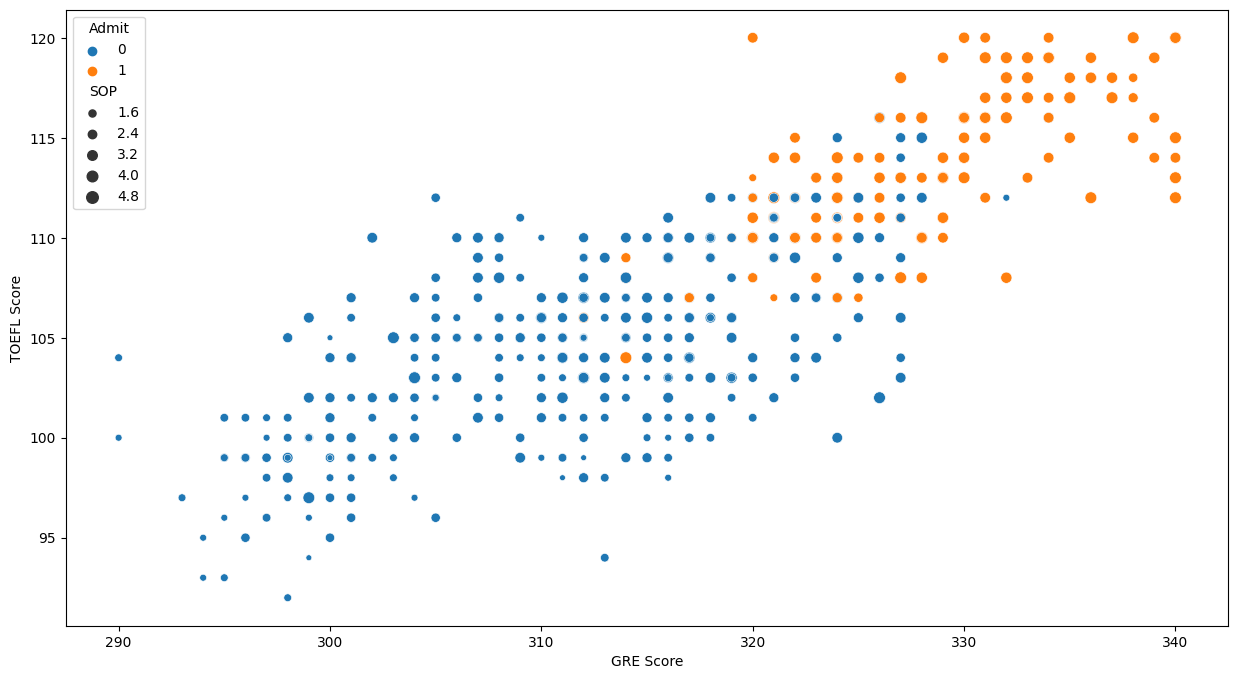

In [7]:
plt.figure(figsize = (15, 8))

sns.scatterplot(data = data,
                 
           x = 'GRE Score',

           y = 'TOEFL Score',

           hue = 'Admit',

           size = 'SOP')

**Observations:** 

- There is a linear relationship between GRE and TOEFL scores. This implies that students scoring high in one of them would score high in the other as well.
- With the increase in GRE and TOEFL scores, the strength of SOP increases. 
- We can see a distinction between students who were admitted (denoted by orange) vs those who were not admitted (denoted by blue). We can see that the majority of students, who were admitted, have GRE scores greater than 320, TOEFL score greater than 105, and SOP of 4 or higher.

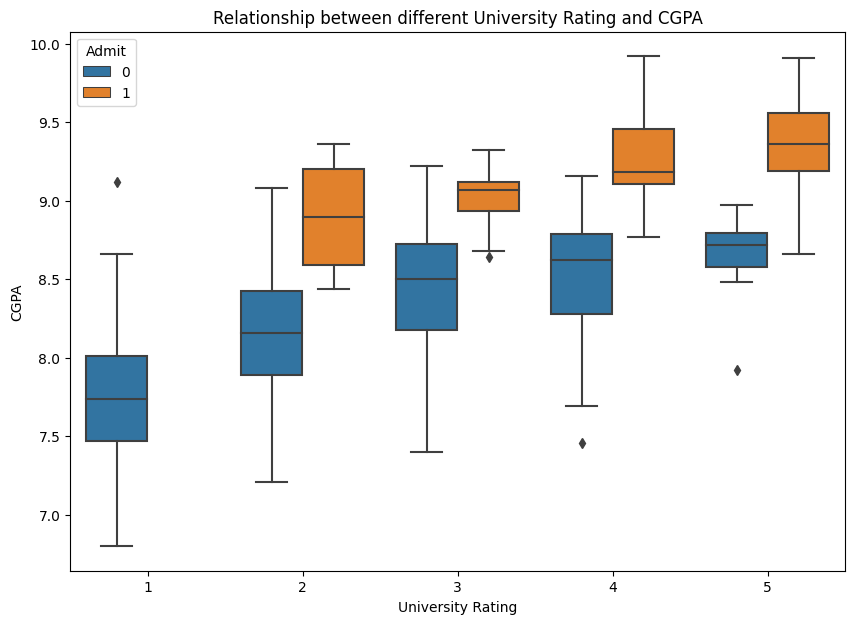

In [8]:
plt.figure(figsize = (10, 7))

sns.boxplot(data = data,
            
             x = 'University Rating', 
            
             y = 'CGPA',
            
             hue = 'Admit')

plt.title('Relationship between different University Rating and CGPA')

plt.show()

**Observations:** 

- We can see that, with increasing university ratings, the CGPA is also increasing, and also the chances of getting admitted to UCLA have increased.
- The CGPA of students getting admission to UCLA is higher as compared to students not getting admission to UCLA which makes sense.

## **Data Preparation**

This dataset contains both numerical and categorical variables. We need to treat them before we pass them onto the neural network. We will perform the below pre-processing steps: 
*   One hot encoding of categorical variables
*   Scaling numerical variables

An important point to remember: Before we scale numerical variables, we would first split the dataset into train and test datasets and perform scaling separately. Otherwise, we would be leaking information from the test data to the train data and the resulting model might give a false sense of good performance. This is known as **data leakage** which we would like to avoid.

In this dataset, although the variable **University Rating** is encoded as a numerical variable. But it is denoting or signifying the quality of the university, so that is why this is a categorical variable and we would be creating one-hot encoding or dummy variables for this variable.

In [9]:
# Creating one-hot encoding for the column - "University Rating" and then dropping University Rating
one_hot_data = pd.concat([data, pd.get_dummies(data['University Rating'], prefix = 'University Rating')], axis = 1)

one_hot_data = one_hot_data.drop(columns = 'University Rating')

one_hot_data.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Admit,University Rating_1,University Rating_2,University Rating_3,University Rating_4,University Rating_5
0,337,118,4.5,4.5,9.65,1,1,0,0,0,1,0
1,324,107,4.0,4.5,8.87,1,0,0,0,0,1,0
2,316,104,3.0,3.5,8.00,1,0,0,0,1,0,0
3,322,110,3.5,2.5,8.67,1,0,0,0,1,0,0
4,314,103,2.0,3.0,8.21,0,0,0,1,0,0,0


Now, let's split the dataset into train and test datasets. To do that, we would be extracting all the **independent variables** and saving them into a variable **features**. And the target variable **Admit** would be saved into a variable **target**. These two variables will be used to split the parent dataset into train and test datasets.

In [10]:
features = one_hot_data.drop(['Admit'], axis = 1)

target = one_hot_data['Admit']

The size of the dataset is small and the Keras implementation provides an argument for selecting some percentage of training data as validation data to check the accuracy of the model. Therefore, we will split the data into an 80:20 ratio.

In [11]:
# Splitting the dataset into the train and the test data
X_train, X_test, y_train, y_test =  train_test_split(features, target, test_size = 0.2, random_state = 42)

Now, we will perform scaling on the numerical variables separately for train and test sets. We will perform **fit** and **transform** on the train data and then we will only perform **transform** on the test data. 

In [12]:
scaler = MinMaxScaler()

# Here, we are passing all the features (numerical and categorical), that's okay as min-max scaler will not change values of categorical variables
X_train_normalized = scaler.fit_transform(X_train)

In [13]:
X_test_normalized = scaler.transform(X_test)

## **Model Building**

In neural networks, there are so many hyper-parameters that you can play around with and tune the network to get the best results. Some of them are: 


1.   Number of hidden layers
2.   Number of neurons in each hidden layer
3.   Activation functions in hidden layers
4.   Optimizers
5.   Random initialization of weights and biases
6.   Batch size
7.   Learning rate
8.   Early stopping
9.   L1 and L2 Regularization
10.  Dropout
11.  Momentum

and so on...

First, let's set the seed for random number generators in NumPy, Python, and TensorFlow to be able to reproduce the same results every time we run the code.

In [14]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

Let's build a feed-forward neural network with 2 hidden layers and the output layer.

In [15]:
# We will be adding the layers sequentially
model_1 = Sequential()

# First hidden layer with 128 neurons and relu activation function, the input_shape tuple denotes number of independent variables
model_1.add(Dense(128, activation = 'relu', input_shape = (11, )))

# We will be switching 20% of neurons randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.2))

# Second hidden layer with 64 neurons and relu activation function
model_1.add(Dense(64, activation = 'relu'))

# We will be switching 10% of neurons off randomly at each iteration to avoid 
model_1.add(Dropout(0.1))

# Output layer with only one neuron and sigmoid as activation function which will give the probability of students getting admitted into UCLA  
model_1.add(Dense(1, activation = 'sigmoid'))

Metal device set to: Apple M1 Pro


2023-05-15 23:50:57.310136: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-15 23:50:57.310591: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Once we are done with the model architecture, we need to compile the model, where we need to provide the loss function that we want to optimize, the optimization algorithm, and the evaluation metric that we are interested in to evaluate the model.

Since this is a binary classification task, we will be minimizing the **binary_crossentropy** and we can choose one optimizer out of 
1.   SGD
2.   RMSprop
3.   Adam
4.   Adadelta
5.   Adagrad
6.   Adamax
7.   Nadam
8.   Ftrl

This is a hyper-parameter. You can play around with these optimizers to check which one performs better with a particular data.

For now, let's try **Adam** optimizer with **accuracy** as the metric and see the model's summary.

In [16]:
model_1.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])    
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,857
Trainable params: 9,857
Non-trainable params: 0
_________________________________________________________________


From the above summary, we can see that this architecture will train a total of **9,857** parameters, i.e., weights and biases in the network.

### **Training the model**

Let's now train the model using the below piece of code. We will keep 10% of the training data for validation.

In [17]:
history_1 = model_1.fit(X_train_normalized, 
                        
                    y_train,

                    validation_split = 0.1, 

                    epochs = 150, 

                    verbose = 2)

Epoch 1/150


2023-05-15 23:51:05.637932: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-15 23:51:05.789087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12/12 - 1s - loss: 0.6297 - accuracy: 0.7250 - val_loss: 0.6197 - val_accuracy: 0.5750 - 668ms/epoch - 56ms/step
Epoch 2/150


2023-05-15 23:51:06.214846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12/12 - 0s - loss: 0.5329 - accuracy: 0.7694 - val_loss: 0.5118 - val_accuracy: 0.8250 - 110ms/epoch - 9ms/step
Epoch 3/150
12/12 - 0s - loss: 0.4339 - accuracy: 0.8611 - val_loss: 0.4026 - val_accuracy: 0.9000 - 108ms/epoch - 9ms/step
Epoch 4/150
12/12 - 0s - loss: 0.3557 - accuracy: 0.8778 - val_loss: 0.3274 - val_accuracy: 0.9000 - 118ms/epoch - 10ms/step
Epoch 5/150
12/12 - 0s - loss: 0.3257 - accuracy: 0.8778 - val_loss: 0.3093 - val_accuracy: 0.9000 - 96ms/epoch - 8ms/step
Epoch 6/150
12/12 - 0s - loss: 0.2918 - accuracy: 0.8806 - val_loss: 0.2891 - val_accuracy: 0.9000 - 100ms/epoch - 8ms/step
Epoch 7/150
12/12 - 0s - loss: 0.2896 - accuracy: 0.8639 - val_loss: 0.2905 - val_accuracy: 0.9250 - 97ms/epoch - 8ms/step
Epoch 8/150
12/12 - 0s - loss: 0.2747 - accuracy: 0.8889 - val_loss: 0.2906 - val_accuracy: 0.9250 - 99ms/epoch - 8ms/step
Epoch 9/150
12/12 - 0s - loss: 0.2682 - accuracy: 0.8861 - val_loss: 0.2845 - val_accuracy: 0.9250 - 97ms/epoch - 8ms/step
Epoch 10/150
12/12 - 0s

Epoch 68/150
12/12 - 0s - loss: 0.1631 - accuracy: 0.9167 - val_loss: 0.2936 - val_accuracy: 0.9250 - 105ms/epoch - 9ms/step
Epoch 69/150
12/12 - 0s - loss: 0.1508 - accuracy: 0.9389 - val_loss: 0.2718 - val_accuracy: 0.9250 - 110ms/epoch - 9ms/step
Epoch 70/150
12/12 - 0s - loss: 0.1482 - accuracy: 0.9278 - val_loss: 0.2820 - val_accuracy: 0.9500 - 104ms/epoch - 9ms/step
Epoch 71/150
12/12 - 0s - loss: 0.1705 - accuracy: 0.9306 - val_loss: 0.2702 - val_accuracy: 0.9250 - 108ms/epoch - 9ms/step
Epoch 72/150
12/12 - 0s - loss: 0.1535 - accuracy: 0.9222 - val_loss: 0.2997 - val_accuracy: 0.9250 - 98ms/epoch - 8ms/step
Epoch 73/150
12/12 - 0s - loss: 0.1535 - accuracy: 0.9222 - val_loss: 0.2735 - val_accuracy: 0.9250 - 96ms/epoch - 8ms/step
Epoch 74/150
12/12 - 0s - loss: 0.1468 - accuracy: 0.9389 - val_loss: 0.2961 - val_accuracy: 0.9250 - 94ms/epoch - 8ms/step
Epoch 75/150
12/12 - 0s - loss: 0.1655 - accuracy: 0.9333 - val_loss: 0.2860 - val_accuracy: 0.9250 - 92ms/epoch - 8ms/step
Epoc

Epoch 134/150
12/12 - 0s - loss: 0.1284 - accuracy: 0.9417 - val_loss: 0.3176 - val_accuracy: 0.9250 - 111ms/epoch - 9ms/step
Epoch 135/150
12/12 - 0s - loss: 0.1353 - accuracy: 0.9361 - val_loss: 0.3342 - val_accuracy: 0.9500 - 105ms/epoch - 9ms/step
Epoch 136/150
12/12 - 0s - loss: 0.1339 - accuracy: 0.9417 - val_loss: 0.3093 - val_accuracy: 0.9500 - 110ms/epoch - 9ms/step
Epoch 137/150
12/12 - 0s - loss: 0.1240 - accuracy: 0.9389 - val_loss: 0.3323 - val_accuracy: 0.9500 - 97ms/epoch - 8ms/step
Epoch 138/150
12/12 - 0s - loss: 0.1270 - accuracy: 0.9361 - val_loss: 0.3356 - val_accuracy: 0.9250 - 96ms/epoch - 8ms/step
Epoch 139/150
12/12 - 0s - loss: 0.1393 - accuracy: 0.9361 - val_loss: 0.3428 - val_accuracy: 0.9500 - 96ms/epoch - 8ms/step
Epoch 140/150
12/12 - 0s - loss: 0.1247 - accuracy: 0.9389 - val_loss: 0.3295 - val_accuracy: 0.9250 - 95ms/epoch - 8ms/step
Epoch 141/150
12/12 - 0s - loss: 0.1462 - accuracy: 0.9361 - val_loss: 0.3354 - val_accuracy: 0.9500 - 112ms/epoch - 9ms/s

### **Plotting Accuracy vs Epoch Curve**

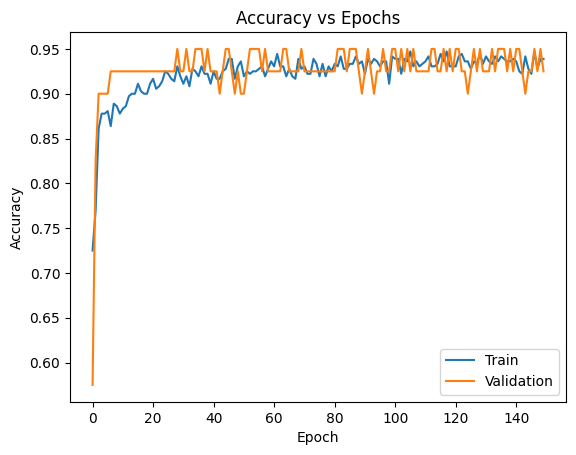

In [18]:
plt.plot(history_1.history['accuracy'])

plt.plot(history_1.history['val_accuracy'])

plt.title('Accuracy vs Epochs')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'lower right')

plt.show()

**Observations:**

- The training accuracy is fluctuating but overall it is increasing with the increase in the epochs.
- The validation accuracy is constant between ~ 20 to 100 epochs and it is fluctuating a bit post 100 epochs.
- The model is giving good accuracy. After 150 epochs, the accuracy of the model on the training data is about 93.9% and the validation accuracy is 92.5%.
- The validation accuracy is closer to the training accuracy. This indicates that the model is giving a generalized performance.

Let's try to increase the model complexity by tuning some of the hyper-parameters mentioned earlier and check if we can improve the model performance. Out of all the options we have, let's try to change the number of hidden layers, the number of neurons in each hidden layer, and the activation function in the hidden layer. Also, we have observed that validation accuracy became constant after some epochs, let's try less number of epochs which would also reduce the computation time. 

First, we need to clear the previous model's history from the session. In Keras, we need special command to clear the model's history otherwise the previous model history remains in the backend.
Also, let's fix the seed again after clearing the backend.

In [19]:
# Clearing the backend
from tensorflow.keras import backend

backend.clear_session()

In [20]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [21]:
model_2 = Sequential()

model_2.add(Dense(128, activation = 'tanh', input_shape = (11, )))

model_2.add(Dropout(0.1))

model_2.add(Dense(64, activation = 'tanh'))

model_2.add(Dropout(0.1))

model_2.add(Dense(32, activation = 'tanh'))

model_2.add(Dense(1, activation = 'sigmoid'))

In [28]:
model_2.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,905
Trainable params: 11,905
Non-traina

In [29]:
history_2 = model_2.fit(X_train_normalized,
                         
                    y_train, 

                    validation_split = 0.1,

                    epochs = 100,

                    verbose = 2)

Epoch 1/100


2023-05-15 23:55:50.790192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12/12 - 1s - loss: 0.1896 - accuracy: 0.9250 - val_loss: 0.2277 - val_accuracy: 0.9500 - 649ms/epoch - 54ms/step
Epoch 2/100


2023-05-15 23:55:51.203865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12/12 - 0s - loss: 0.1493 - accuracy: 0.9444 - val_loss: 0.2597 - val_accuracy: 0.9250 - 127ms/epoch - 11ms/step
Epoch 3/100
12/12 - 0s - loss: 0.1544 - accuracy: 0.9306 - val_loss: 0.2278 - val_accuracy: 0.9000 - 109ms/epoch - 9ms/step
Epoch 4/100
12/12 - 0s - loss: 0.1636 - accuracy: 0.9194 - val_loss: 0.2230 - val_accuracy: 0.9500 - 110ms/epoch - 9ms/step
Epoch 5/100
12/12 - 0s - loss: 0.1498 - accuracy: 0.9278 - val_loss: 0.2279 - val_accuracy: 0.9500 - 111ms/epoch - 9ms/step
Epoch 6/100
12/12 - 0s - loss: 0.1495 - accuracy: 0.9444 - val_loss: 0.2284 - val_accuracy: 0.9250 - 114ms/epoch - 10ms/step
Epoch 7/100
12/12 - 0s - loss: 0.1450 - accuracy: 0.9306 - val_loss: 0.2412 - val_accuracy: 0.9500 - 102ms/epoch - 8ms/step
Epoch 8/100
12/12 - 0s - loss: 0.1538 - accuracy: 0.9222 - val_loss: 0.2439 - val_accuracy: 0.9250 - 102ms/epoch - 8ms/step
Epoch 9/100
12/12 - 0s - loss: 0.1453 - accuracy: 0.9361 - val_loss: 0.2507 - val_accuracy: 0.9250 - 103ms/epoch - 9ms/step
Epoch 10/100
12/12

Epoch 68/100
12/12 - 0s - loss: 0.1504 - accuracy: 0.9250 - val_loss: 0.2750 - val_accuracy: 0.9500 - 113ms/epoch - 9ms/step
Epoch 69/100
12/12 - 0s - loss: 0.1371 - accuracy: 0.9389 - val_loss: 0.2645 - val_accuracy: 0.9250 - 112ms/epoch - 9ms/step
Epoch 70/100
12/12 - 0s - loss: 0.1412 - accuracy: 0.9389 - val_loss: 0.2652 - val_accuracy: 0.9500 - 116ms/epoch - 10ms/step
Epoch 71/100
12/12 - 0s - loss: 0.1560 - accuracy: 0.9333 - val_loss: 0.2584 - val_accuracy: 0.9500 - 113ms/epoch - 9ms/step
Epoch 72/100
12/12 - 0s - loss: 0.1532 - accuracy: 0.9333 - val_loss: 0.2788 - val_accuracy: 0.9250 - 112ms/epoch - 9ms/step
Epoch 73/100
12/12 - 0s - loss: 0.1454 - accuracy: 0.9333 - val_loss: 0.2586 - val_accuracy: 0.9250 - 105ms/epoch - 9ms/step
Epoch 74/100
12/12 - 0s - loss: 0.1488 - accuracy: 0.9250 - val_loss: 0.2825 - val_accuracy: 0.9250 - 98ms/epoch - 8ms/step
Epoch 75/100
12/12 - 0s - loss: 0.1544 - accuracy: 0.9167 - val_loss: 0.2675 - val_accuracy: 0.9500 - 98ms/epoch - 8ms/step
E

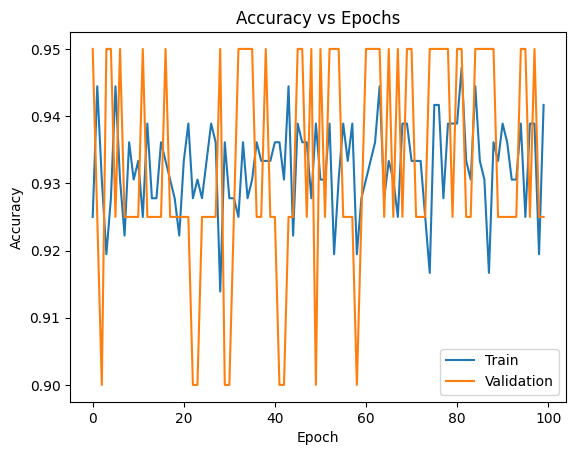

In [30]:
plt.plot(history_2.history['accuracy'])

plt.plot(history_2.history['val_accuracy'])

plt.title('Accuracy vs Epochs')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'lower right')

plt.show()

**Observations:** 

- Roughly the same results as the previous model.
- The validation accuracy is higher than the training accuracy. This might be due to the small size of the validation set and the model can correctly classify the data points in the validation set.

Let's try to further tune some of the hyper-parameters and check if we can improve the model performance.

We will use learning_rate = 0.001 for the optimizer in the training process and increase the model complexity by further increasing the number of layers, the number of nodes in each layer, and the epochs.

In [31]:
# Clearing the backend
from tensorflow.keras import backend

backend.clear_session()

In [32]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [33]:
model_3 = Sequential()

model_3.add(Dense(256, activation = 'tanh', input_shape = (11, )))

model_3.add(Dropout(0.1))

model_3.add(Dense(128, activation = 'tanh'))

model_3.add(Dropout(0.1))

model_3.add(Dense(64, activation = 'tanh'))

model_3.add(Dropout(0.1))

model_3.add(Dense(32, activation = 'tanh'))

model_3.add(Dense(1, activation = 'sigmoid'))

In [34]:
model_3.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), metrics = ['accuracy'])

model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

- Notice that the number of trainable parameters has increased substantially in comparison to previous models.

In [35]:
history_3 = model_3.fit(X_train_normalized, 
                        
                    y_train,

                    validation_split = 0.1,

                    epochs = 200,

                    verbose = 2)

Epoch 1/200


2023-05-15 23:57:30.733579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12/12 - 1s - loss: 0.4994 - accuracy: 0.7917 - val_loss: 0.3555 - val_accuracy: 0.9000 - 802ms/epoch - 67ms/step
Epoch 2/200


2023-05-15 23:57:31.274045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12/12 - 0s - loss: 0.3494 - accuracy: 0.8694 - val_loss: 0.3272 - val_accuracy: 0.9000 - 132ms/epoch - 11ms/step
Epoch 3/200
12/12 - 0s - loss: 0.3308 - accuracy: 0.8611 - val_loss: 0.2997 - val_accuracy: 0.9000 - 137ms/epoch - 11ms/step
Epoch 4/200
12/12 - 0s - loss: 0.3031 - accuracy: 0.8667 - val_loss: 0.2826 - val_accuracy: 0.9250 - 120ms/epoch - 10ms/step
Epoch 5/200
12/12 - 0s - loss: 0.2892 - accuracy: 0.8806 - val_loss: 0.2477 - val_accuracy: 0.9000 - 126ms/epoch - 11ms/step
Epoch 6/200
12/12 - 0s - loss: 0.2997 - accuracy: 0.8528 - val_loss: 0.2661 - val_accuracy: 0.9250 - 122ms/epoch - 10ms/step
Epoch 7/200
12/12 - 0s - loss: 0.2533 - accuracy: 0.8833 - val_loss: 0.2880 - val_accuracy: 0.9250 - 117ms/epoch - 10ms/step
Epoch 8/200
12/12 - 0s - loss: 0.2364 - accuracy: 0.9000 - val_loss: 0.2642 - val_accuracy: 0.9250 - 117ms/epoch - 10ms/step
Epoch 9/200
12/12 - 0s - loss: 0.2494 - accuracy: 0.8778 - val_loss: 0.2312 - val_accuracy: 0.9250 - 112ms/epoch - 9ms/step
Epoch 10/200


Epoch 68/200
12/12 - 0s - loss: 0.1755 - accuracy: 0.9139 - val_loss: 0.2370 - val_accuracy: 0.9250 - 111ms/epoch - 9ms/step
Epoch 69/200
12/12 - 0s - loss: 0.1530 - accuracy: 0.9333 - val_loss: 0.2202 - val_accuracy: 0.9250 - 128ms/epoch - 11ms/step
Epoch 70/200
12/12 - 0s - loss: 0.1562 - accuracy: 0.9306 - val_loss: 0.2204 - val_accuracy: 0.9500 - 119ms/epoch - 10ms/step
Epoch 71/200
12/12 - 0s - loss: 0.1667 - accuracy: 0.9222 - val_loss: 0.2160 - val_accuracy: 0.9500 - 112ms/epoch - 9ms/step
Epoch 72/200
12/12 - 0s - loss: 0.1667 - accuracy: 0.9139 - val_loss: 0.2751 - val_accuracy: 0.9250 - 124ms/epoch - 10ms/step
Epoch 73/200
12/12 - 0s - loss: 0.1559 - accuracy: 0.9250 - val_loss: 0.2125 - val_accuracy: 0.9250 - 114ms/epoch - 9ms/step
Epoch 74/200
12/12 - 0s - loss: 0.1593 - accuracy: 0.9222 - val_loss: 0.2680 - val_accuracy: 0.9250 - 111ms/epoch - 9ms/step
Epoch 75/200
12/12 - 0s - loss: 0.1839 - accuracy: 0.9139 - val_loss: 0.2167 - val_accuracy: 0.9250 - 127ms/epoch - 11ms/s

Epoch 133/200
12/12 - 0s - loss: 0.1239 - accuracy: 0.9417 - val_loss: 0.2293 - val_accuracy: 0.9500 - 132ms/epoch - 11ms/step
Epoch 134/200
12/12 - 0s - loss: 0.1258 - accuracy: 0.9333 - val_loss: 0.2196 - val_accuracy: 0.9250 - 123ms/epoch - 10ms/step
Epoch 135/200
12/12 - 0s - loss: 0.1322 - accuracy: 0.9361 - val_loss: 0.2678 - val_accuracy: 0.9250 - 114ms/epoch - 9ms/step
Epoch 136/200
12/12 - 0s - loss: 0.1355 - accuracy: 0.9389 - val_loss: 0.2138 - val_accuracy: 0.9500 - 116ms/epoch - 10ms/step
Epoch 137/200
12/12 - 0s - loss: 0.1351 - accuracy: 0.9333 - val_loss: 0.2272 - val_accuracy: 0.9500 - 115ms/epoch - 10ms/step
Epoch 138/200
12/12 - 0s - loss: 0.1284 - accuracy: 0.9389 - val_loss: 0.2470 - val_accuracy: 0.9250 - 109ms/epoch - 9ms/step
Epoch 139/200
12/12 - 0s - loss: 0.1246 - accuracy: 0.9306 - val_loss: 0.2452 - val_accuracy: 0.9250 - 112ms/epoch - 9ms/step
Epoch 140/200
12/12 - 0s - loss: 0.1321 - accuracy: 0.9389 - val_loss: 0.2227 - val_accuracy: 0.9500 - 117ms/epoch

Epoch 198/200
12/12 - 0s - loss: 0.1477 - accuracy: 0.9333 - val_loss: 0.2177 - val_accuracy: 0.9500 - 128ms/epoch - 11ms/step
Epoch 199/200
12/12 - 0s - loss: 0.1162 - accuracy: 0.9528 - val_loss: 0.2480 - val_accuracy: 0.9250 - 133ms/epoch - 11ms/step
Epoch 200/200
12/12 - 0s - loss: 0.1086 - accuracy: 0.9528 - val_loss: 0.2387 - val_accuracy: 0.9500 - 124ms/epoch - 10ms/step


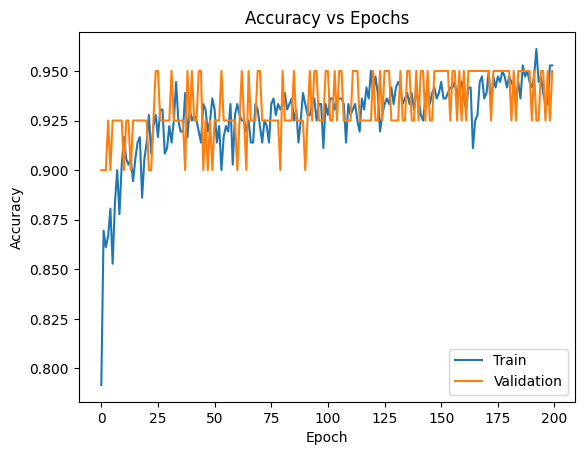

In [36]:
plt.plot(history_3.history['accuracy'])

plt.plot(history_3.history['val_accuracy'])

plt.title('Accuracy vs Epochs')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc  = 'lower right')

plt.show()

- This model is giving a generalized performance with 95% accuracy on the train as well as validation data.
- One reason for the algorithm not being able to reach higher than 95% even for training data might be due to the optimizer being stuck at some local minima.
- One way to resolve that is to further tune the model with some other hyper-parameters.
- Among all three models, model 3 has given the best performance. Let's check its performance on the test data.

## **Model evaluation on the test data**

In [37]:
model_3.evaluate(X_test_normalized, y_test, verbose = 1)

test_pred = np.round(model_3.predict(X_test_normalized))

4/4 [==============================] - 0s 8ms/step


2023-05-15 23:58:49.023521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


The test accuracy is also coming out to be 95% which implies that our model is able to replicate the performance from the train and validation data on the test (unseen) data.

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        73
           1       0.89      0.93      0.91        27

    accuracy                           0.95       100
   macro avg       0.93      0.94      0.94       100
weighted avg       0.95      0.95      0.95       100



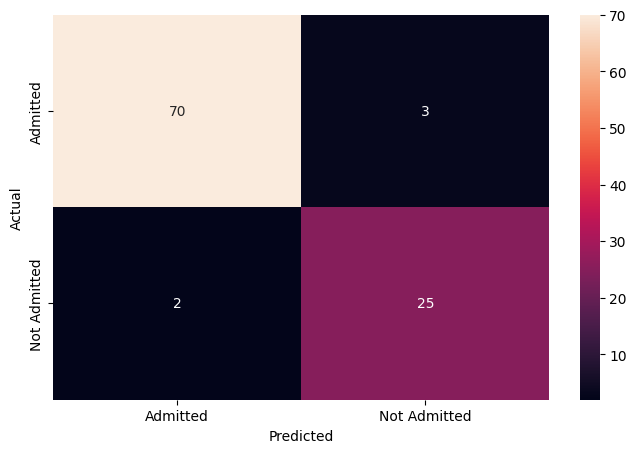

In [38]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

print(classification_report(y_test, test_pred))

cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Admitted', 'Not Admitted'], yticklabels = ['Admitted', 'Not Admitted'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

- The confusion matrix shows that the model can identify the majority of students who would get admission and who won't get admission to UCLA.
- The classification report shows that all the metrics except recall for class 1 are above 90%, which is good.

## **Conclusion**

In this case study, 
- We have learned how to build a feed-forward neural network for a classification task using Keras. 
- We have seen different hyper-parameters and how they affect the network. 
- We have also learned about the accuracy vs epoch curve and how it helps to understand the model is learning the weights. 
- We were able to get the test accuracy of 95% using the final model.